# CSI300 指数的走势和收益率分布

1461


<Axes: xlabel='trade_date'>

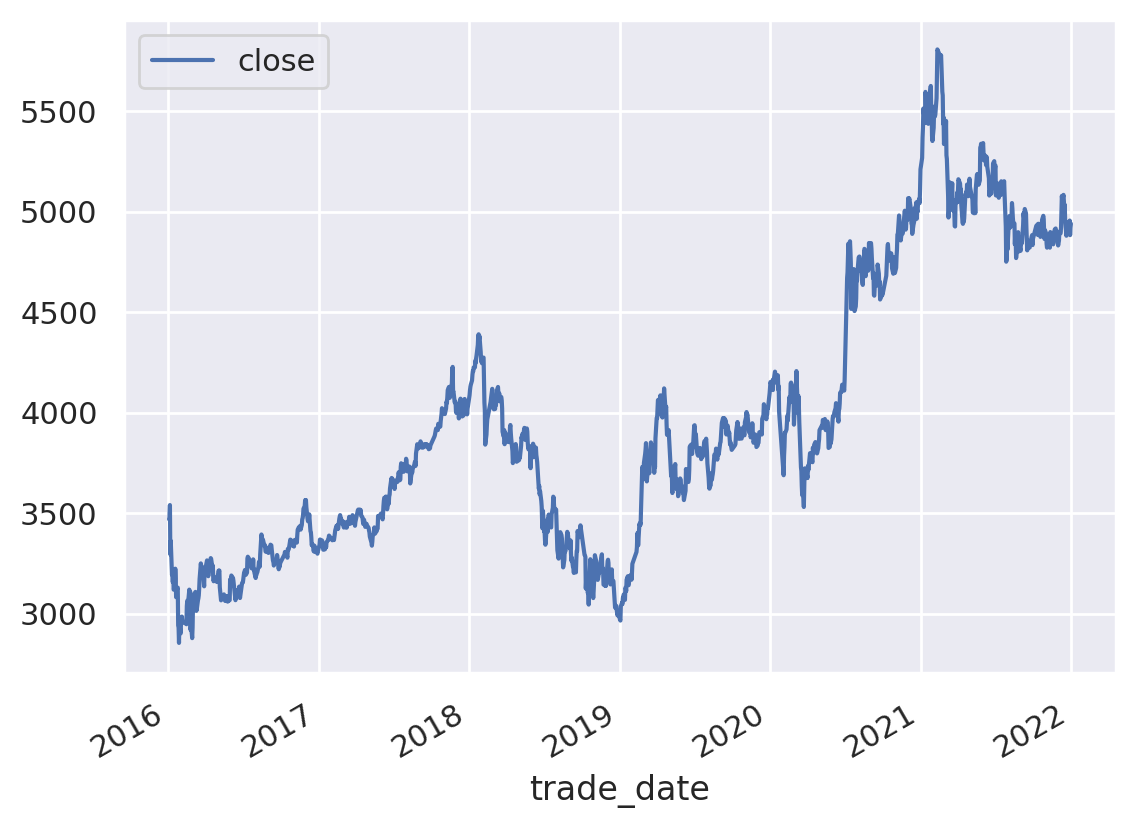

In [17]:
# packages and globals
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# inline mat
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.dpi'] = 300
import tushare as ts
ts.set_token('4167d168dd2c182108319b0f5fc93d66b21d5ccf2baa2af2a522b80d')
pro = ts.pro_api()

# quiet 执行不显示warning
import warnings
warnings.filterwarnings('ignore')

start_date = '2016-01-01'
# end_date = '2023-01-01'
end_date = '2022-01-01'
# 沪深300指数
csi300_df = pro.index_daily(ts_code='000300.SH',
                            start_date=start_date,
                            end_date=end_date)
# date to datetime
csi300_df['trade_date'] = pd.to_datetime(csi300_df['trade_date'])
# sort csi300
csi300_df = csi300_df.sort_values(by='trade_date', ascending=True)
print(len(csi300_df))
csi300_df.plot(x='trade_date', y='close')


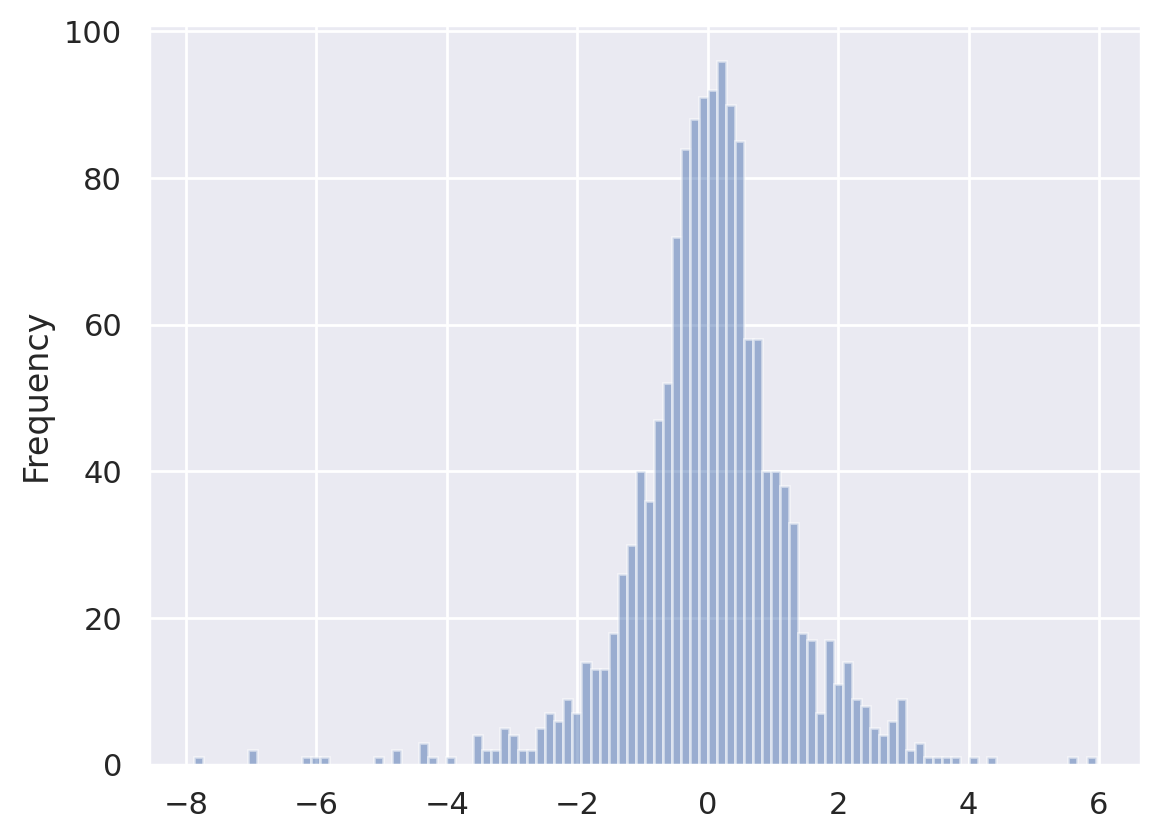

In [18]:
# 画收益率分布，验证尖峰厚尾
csi300_df['pct_chg'].plot.hist(bins=100, alpha=0.5)
plt.show()



mean: 0.026921149897330597
1
mean: [-0.09492216]
std: [[1.98958813]]
weight: 0.287441648690642
2
mean: [0.07607199]
std: [[0.73754982]]
weight: 0.712558351309358


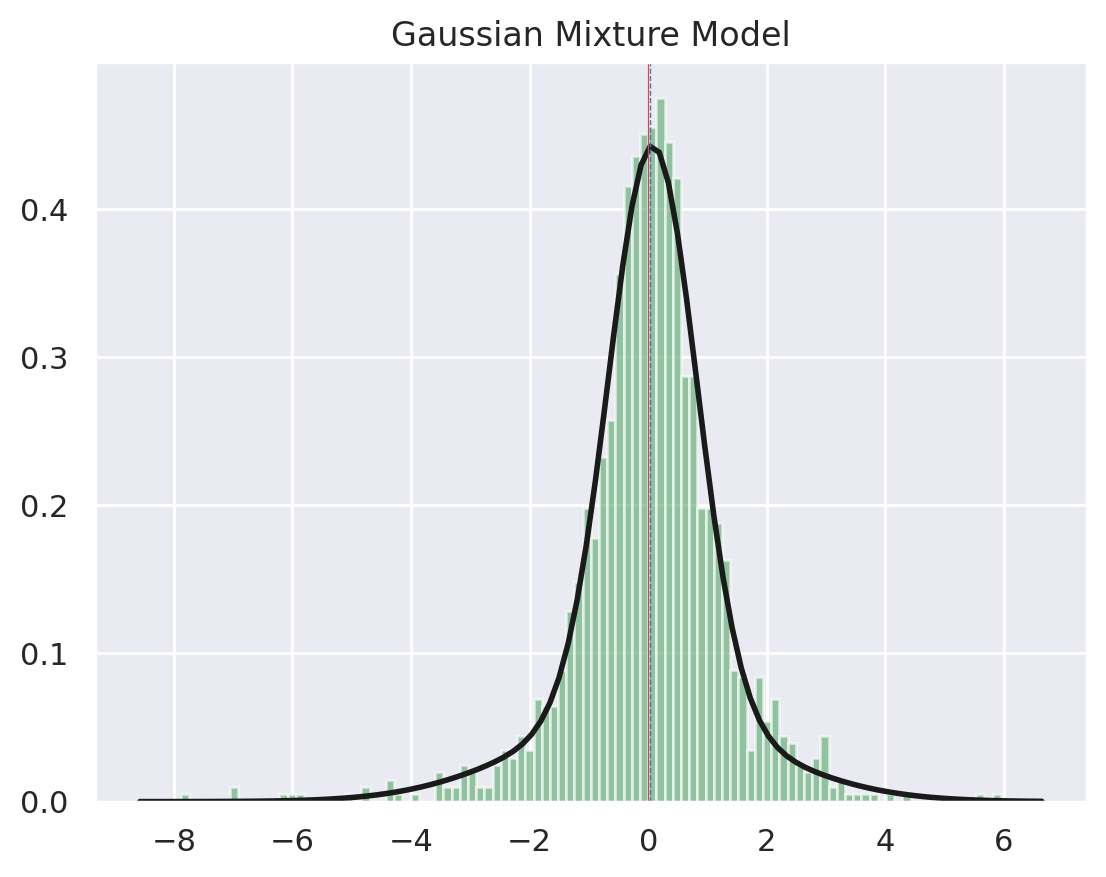

In [20]:
# 拟合高斯混合分布
from sklearn.mixture import GaussianMixture

n_components = 2

gmm = GaussianMixture(n_components=n_components, covariance_type='full').fit(csi300_df['pct_chg'].values.reshape(-1, 1))
# 画图
plt.hist(csi300_df['pct_chg'], bins=100, density=True, alpha=0.6, color='g')
# 画拟合曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gmm.score_samples(x.reshape(-1, 1))
plt.plot(x, np.exp(p), 'k', linewidth=2)

# 画x=0
plt.axvline(x=0, color='r',linewidth=0.5) 

# 画收益率分布平均值
plt.axvline(x=csi300_df['pct_chg'].mean(), color='b', linestyle='--',linewidth=0.5)
print('mean:', csi300_df['pct_chg'].mean())
# 输出两个混合分布参数
for i in range(n_components):
    print(i+1)
    print('mean:', gmm.means_[i])
    print('std:', np.sqrt(gmm.covariances_[i]))
    print('weight:', gmm.weights_[i])

# 分布参数作为注释, 居中显示
# plt.annotate('1. mean: %.2f, std: %.2f, weight: %.2f \n2. mean: %.2f, std: %.2f, weight: %.2f' % \
#              (gmm.means_[0], np.sqrt(gmm.covariances_[0]), gmm.weights_[0],gmm.means_[1]\
#               , np.sqrt(gmm.covariances_[1]), gmm.weights_[1]), xy=(0.1, 0.85), xycoords='axes fraction')

# 标题
plt.title('Gaussian Mixture Model')

plt.show()